# Spherical Harmonic Shape Descriptor
Eamon Whalen

In [76]:
import numpy as np
import pyvista as pv
import trimesh
from scipy.special import roots_legendre

In [197]:
# load mesh
mesh = pv.read('meshes/0.obj')

# center at origin (for now find via average node position)
cog = np.mean(mesh.points, axis=0)
mesh.points -= (cog)

# scale to unit sphere
bndSphere = np.max(np.linalg.norm(mesh.points, axis=1))
mesh.points /= bndSphere

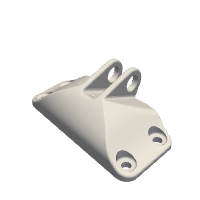

In [198]:
# visualize
plotter = pv.Plotter()
plotter.set_background('white')
plotter.add_mesh(mesh, show_edges=False, color='white')

cpos = [(-242.19, -271.14, 301.84),
         (14.08, -73.27, 31.25),
         (0.48, 0.42, 0.76)]

plotter.show(window_size=(200,200));

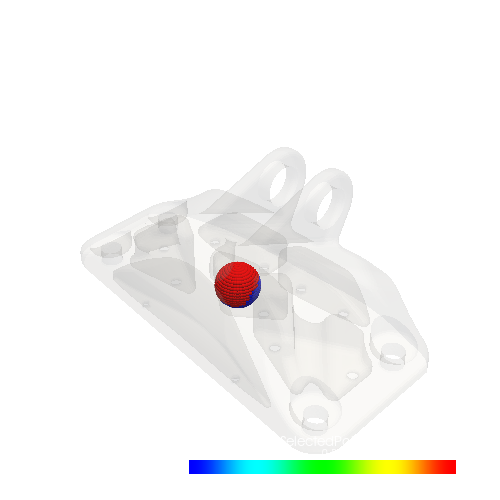

In [199]:
# get Gauss-Legendre Quadrature points
lmax = 20 # (max degree or frequency)
nodes, weights = roots_legendre(lmax+1)
thetas = np.arcsin(nodes) - np.pi/2
period = 2*lmax+1
phis = np.linspace(0, 2*np.pi, period)

# for a given radius, compute cartesian coordinates
r = 0.1
Thetas, Phis = np.meshgrid(thetas, phis)
x = r*np.sin(Thetas.flatten())*np.cos(Phis.flatten())
y = r*np.sin(Thetas.flatten())*np.sin(Phis.flatten())
z = r*np.cos(Thetas.flatten())

# determine if points are inside or outside the mesh
points = np.vstack([x,y,z]).T
pc = pv.PolyData(points)
pc = pc.select_enclosed_points(mesh)

# visualize
sp1 = pv.Sphere(radius=r)
plotter = pv.Plotter()
plotter.set_background('white')
plotter.add_mesh(sp1, show_edges=False, color='pink', opacity=0.5)
plotter.add_mesh(pc, render_points_as_spheres=True)
plotter.add_mesh(mesh, show_edges=False, color='white', opacity=0.1)
plotter.show(window_size=(500,500));

In [188]:
pc.select_enclosed_points(mesh, check_surface=True)['SelectedPoints']

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
# voxelization(?)

# gaussian edt(?)

# choose sphere radii, for each radius, 

#    sample at legendre points
https://docs.pyvista.org/examples/01-filter/extract-cells-inside-surface.html?highlight=select_enclosed_points
#    SHT transform

# build 2D descriptor from coefficients



